# Titanic Dataset
#### Use Pandas to read the dataset

In [1]:
import pandas as pd

titanic = pd.read_csv('titanic/train.csv')

In [2]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

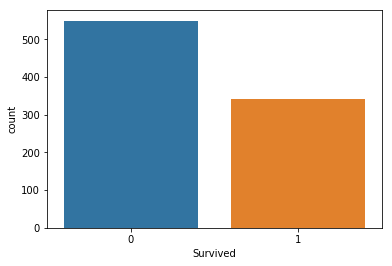

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#Visualize the count of number of survivors
sns.countplot(titanic['Survived'],label="Count")

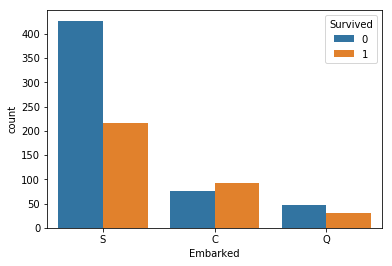

In [7]:
sns.countplot(titanic['Embarked'], hue=titanic["Survived"])

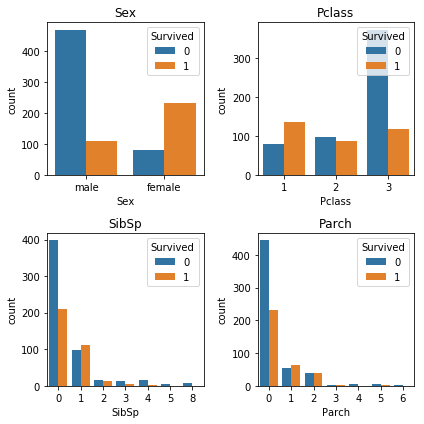

In [8]:
# Visualize the count of survivors for columns 'sex', 'pclass', 'sibsp', 'parch'
cols = ['Sex', 'Pclass', 'SibSp', 'Parch']

n_rows = 2
n_cols = 2

# The subplot grid and the figure size of each graph
# This returns a Figure (fig) and an Axes Object (axs)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3,n_rows*3))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(titanic[cols[i]], hue=titanic["Survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="Survived", loc='upper right')
        
plt.tight_layout()   #tight_layout

In [9]:
#Look at survival rate by sex

titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [10]:
#Look at survival rate by sex and class

titanic.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


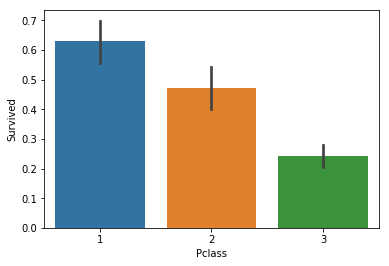

In [11]:
#Plot the survival rate of each class.

sns.barplot(x='Pclass', y='Survived', data=titanic)

In [12]:
#Look at survival rate by sex, age and class

age = pd.cut(titanic['Age'], [0, 18, 80])

titanic.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

### Check and process the invalid data

In [13]:
titanic.shape

(891, 12)

In [14]:
#Count the empty (NaN, NAN, na) values in each column 
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
#Remove the rows with missing values
titanic = titanic.dropna(subset =['Embarked', 'Age'])

#Count the NEW number of rows and columns in the data set
titanic.shape

(712, 12)

### Remove unnecessary columns

In [16]:
# Unnecessary columns
rem = ["PassengerId", "Name", "Ticket", "Cabin"]

titanic = titanic.drop(columns=rem)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


### Check for the datatype

In [17]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [18]:
#Print the unique values in the columns
print(titanic['Sex'].unique())
print(titanic['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


### Label Encoding

In [19]:
#Encoding categorical data values (Transforming object data types to integers)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode sex column
titanic.iloc[:,2]= labelencoder.fit_transform(titanic.iloc[:,2].values)

#Encode embarked
titanic.iloc[:,7]= labelencoder.fit_transform(titanic.iloc[:,7].values)

#Print the NEW unique values in the columns
print(titanic['Sex'].unique())
print(titanic['Embarked'].unique())

[1 0]
[2 0 1]


In [20]:
#Split the data into independent 'X' and dependent 'Y' variables

X = titanic.iloc[:, 1:8].values 
Y = titanic.iloc[:, 0].values 

### Train Test Split

In [21]:
# Split the dataset into 80% Training set and 20% Testing set

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [22]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Training the model 

#### KNeighborsClassifier

In [23]:
# KNeighborsClassifier classifier

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
training_score = knn_clf.score(X_test, Y_test)
print("training_score: "+str(training_score))

y_pred= knn_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

training_score: 0.755244755245
Confusion Matrix: 
[[67 15]
 [20 41]]


In [25]:
from sklearn.metrics import classification_report
cr = classification_report(Y_test, y_pred)

print("KNeighborsClassifier classification Report:")
print(cr)

KNeighborsClassifier classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        82
           1       0.73      0.67      0.70        61

   micro avg       0.76      0.76      0.76       143
   macro avg       0.75      0.74      0.75       143
weighted avg       0.75      0.76      0.75       143



#### Random Forest Classifier

In [26]:
# Random forest Classifier

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [27]:
training_score = forest.score(X_test, Y_test)
print("training_score: "+str(training_score))

y_pred_forest = forest.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred_forest)
print("Confusion Matrix: ")
print(cm)

training_score: 0.839160839161
Confusion Matrix: 
[[73  9]
 [14 47]]


In [28]:
from sklearn.metrics import classification_report
cr = classification_report(Y_test, y_pred_forest)

print("RandomForestClassifier classification Report:")
print(cr)

RandomForestClassifier classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        82
           1       0.84      0.77      0.80        61

   micro avg       0.84      0.84      0.84       143
   macro avg       0.84      0.83      0.83       143
weighted avg       0.84      0.84      0.84       143

